# $\color{black}{}$
### 5. Nearest Neighbours
---

When you ask for a prediction from k-NN for a data point x, the algorithm looks at all the training data that was passed in and finds the __*k*__ nearest (e.g. the 5 nearest) data points. The label of __*x*__ will then be based on whichever label was found most frequently within the __*k*__ neighbours.

![title](https://milliams.com/courses/applied_data_analysis/knn.gif)

<AxesSubplot:xlabel='x1', ylabel='x2'>

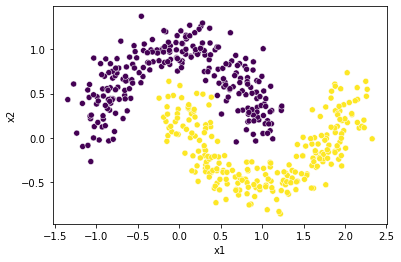

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.15, random_state=42)
X = pd.DataFrame(X, columns=['x1', 'x2'])

sns.scatterplot(data=X, x='x1', y='x2', c=y)

In [9]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

The most important hyperparameter for k-NN is __*k*__, or the number of neighbours. The model defaults to 5 but you can set it to any integer you wish.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)

KNeighborsClassifier()

K-nearest neighbours is different in that it is a __*non-generalising learning algorithm*__ (also referred to as __*instance-based learning*__). It doesn't simplify down the training data we pass in, it actually stores *__all__* of it internally. Thinking about it, this makes sense as when we ask it to make a prediction it needs to actually go and find the data points that are near the prediction site. This means that if we train a model on more data, the model becomes more heavyweight (i.e. may use more memory) and will likely become slower (as it needs to check more points to find the neighbours).

In [11]:
model.score(test_X, test_y)

1.0

Let's take a look at the distribution of predictions compared to the input data.

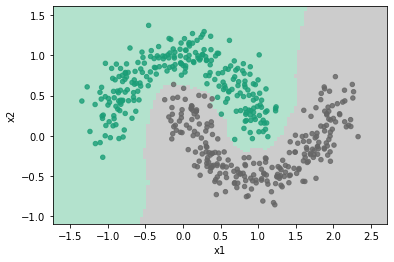

In [12]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)
    
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap='Pastel2', alpha=1.0, shading='auto')
    X.plot.scatter(0, 1, c=y, colormap='Dark2', colorbar=False, alpha=0.8, ax=ax)
    
plot_knn(model, X, y)